In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data=pd.read_csv('Ecommerce Customers.csv')
raw_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
raw_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
data_1=raw_data.copy()

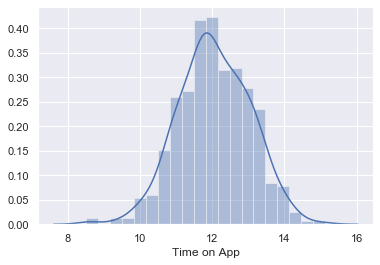

In [7]:
sns.distplot(data_1['Time on App'])

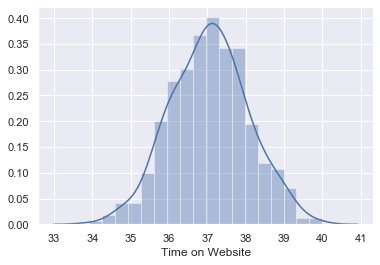

In [8]:
sns.distplot(data_1['Time on Website'])

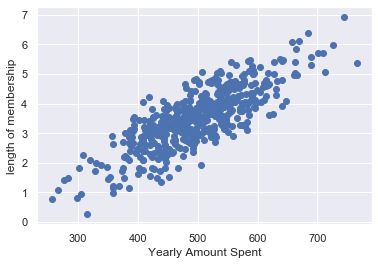

In [9]:
plt.scatter(data_1['Yearly Amount Spent'],data_1['Length of Membership'])
plt.xlabel('Yearly Amount Spent')
plt.ylabel('length of membership')
plt.show()

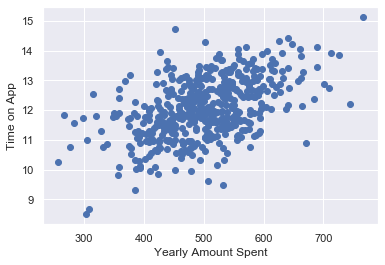

In [10]:
plt.scatter(data_1['Yearly Amount Spent'],data_1['Time on App'])
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Time on App')
plt.show()

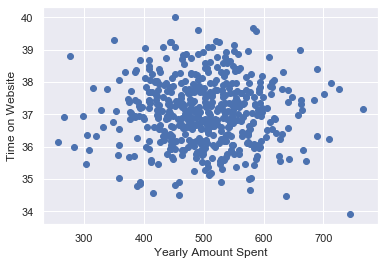

In [11]:
plt.scatter(data_1['Yearly Amount Spent'],data_1['Time on Website'])
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Time on Website')
plt.show()

## Split data

In [35]:
data_1.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
y=data_1['Yearly Amount Spent']
x=data_1[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=101)

In [44]:
y_train

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
          ...    
63     483.159721
326    505.230068
337    440.002748
11     522.337405
351    533.396554
Name: Yearly Amount Spent, Length: 350, dtype: float64

## Training the model

In [45]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg.score(x,y)

0.9842727142336021

In [48]:
reg.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [49]:
reg.intercept_

-1047.9327822502385

## Predict the data from x_test dataset

In [52]:
predictions=reg.predict(x_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

## Plot the prediction and y_test

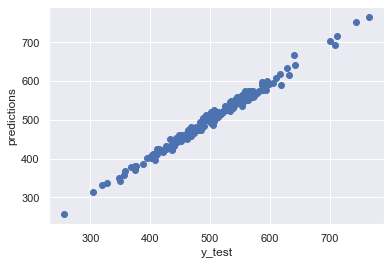

In [54]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

## Model evaluation

In [55]:
from sklearn import metrics

In [57]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.228148653430838
MSE 79.81305165097461
RMSE 8.933815066978642


## Plot the residuals

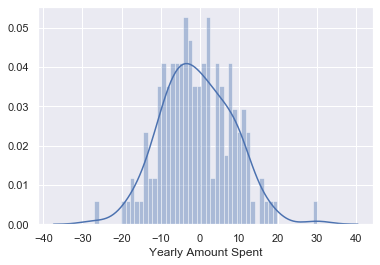

In [59]:
# the error between target & prediction
sns.distplot(y_test-predictions,bins=50)

## Summary table

In [72]:
summary=pd.DataFrame(reg.coef_,x.columns,columns=['coeff'])
summary

,coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
